With 12 short GRB:
Old H0 accuracy with THESEUS+ET and THESEUS+ET+CE+CE
1.4495689014324225
1.0832964737319142
With 14 short GRB:
Old H0 accuracy with THESEUS+ET and THESEUS+ET+CE+CE
1.342040024951353
1.0029376493937339
With 30 short GRB:
Old H0 accuracy with THESEUS+ET and THESEUS+ET+CE+CE
0.9167878707749137
0.6851368476443227
With 36 short GRB:
Old H0 accuracy with THESEUS+ET and THESEUS+ET+CE+CE
0.8369089954509192
0.625441510721293
With 14 short GRB:
New H0 accuracy with THESEUS+ET
1.342040024951353
1.0029376493937339
With 17 short GRB:
New H0 accuracy with THESEUS+ET
1.2178814778613094
0.9101510863587429
With 36 short GRB:
New H0 accuracy with THESEUS+ET
0.8369089954509192
0.625441510721293
With 43 short GRB:
New H0 accuracy with THESEUS+ET
0.7657645518285691
0.5722736172699697


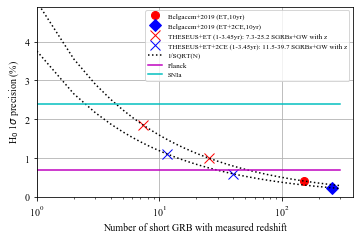

In [4]:
import numpy as np
import matplotlib.pyplot as plt

golden_ratio=(1.+np.sqrt(5))/2.
ysize = 3.5 #inches
plt.rcParams['figure.figsize']=(ysize * golden_ratio, ysize)
#from matplotlib import rc
#rc('font',**{'family':'sans','serif':['Times New Roman']})
#rc('text', usetex=True)
plt.rcParams["font.family"] = "Times New Roman"


# from Belgacem+2019 with 15 short GRB / yr (45 in 3 yrs)

def dH0(Nb,P,N):
    # Nb = number of short GRB from Belgacem et al. 2019 that provide precision P on H0
    # P = precision on H0 given the number of short GRB Nb
    # N = number of short GRB that we want to test
    return P*(np.sqrt(Nb)/np.sqrt(N))


# === INPUT DATA ===

# Belgacem values
xb_ET=150
P_ET=0.41
xb_ET_CE_CE=255
P_ET_CE_CE=0.235

#Zhao and van den broek et al
xz=1000
Pz=0.33

# SGRB with Theseus (1/3, 1/2, 2/3 and tot) 
#pz=0.63   #with z (63%)
pz=0.73   #with z (25%+38%) + 0.75*(13%)
#pz=1.0

Non=12   # onaxis short GRB with THESEUS

Nonoff=Non*1.768

#N_ET_1yr=round(2.3*pz,1)
#N_ET_4yr=round(8*pz,1)
N_ET_1yr=round(0.47*Nonoff*pz,1)    #ET sees 47% of short GRB
N_ET_4yr=round(N_ET_1yr*3.45,1)

#N_ET_CE_1yr=round(6*pz,1)
#N_ET_CE_4yr=round(21*pz,1)
N_ET_CE_1yr=round(0.64*Nonoff*pz,1)   #ET+CE sees 64% of short GRB
N_ET_CE_4yr=round(N_ET_CE_1yr*3.45,1)
N_ET_2CE_1yr=round(0.74*Nonoff*pz,1)  #ET+2CE sees 74% of short GRB
N_ET_2CE_4yr=round(N_ET_2CE_1yr*3.45,1)


Ntot=20
Nnew=40



# === PLOT ===


x=np.arange(300)+1

# compute Belgacem accuracy 
y_ET=dH0(xb_ET,P_ET,x)
y_ET_CE_CE=dH0(xb_ET_CE_CE,P_ET_CE_CE,x)
yz=dH0(xz,Pz,x)

# compute true accuracy
y_ET_4yr=dH0(xb_ET,P_ET,x*0+N_ET_4yr)
y_ET_1yr=dH0(xb_ET,P_ET,x*0+N_ET_1yr)

y_ET_CE_CE_1yr=dH0(xb_ET_CE_CE,P_ET_CE_CE,x*0+N_ET_2CE_1yr)
y_ET_CE_CE_4yr=dH0(xb_ET_CE_CE,P_ET_CE_CE,x*0+N_ET_2CE_4yr)


# theseus short GRB detection with IRT and from XGIS only
old=[12,14,30,36]
new=[14,17,36,43]

for i in old:
    print('With '+str(i)+' short GRB:')
    print('Old H0 accuracy with THESEUS+ET and THESEUS+ET+CE+CE')
    print(dH0(xb_ET,P_ET,x*0+i)[0])
    print(dH0(xb_ET_CE_CE,P_ET_CE_CE,x*0+i)[0])
for i in new:
    print('With '+str(i)+' short GRB:')
    print('New H0 accuracy with THESEUS+ET')
    print(dH0(xb_ET,P_ET,x*0+i)[0])    
    print(dH0(xb_ET_CE_CE,P_ET_CE_CE,x*0+i)[0])


plt.xlabel('Number of short GRB with measured redshift')
plt.ylabel('H$_0$ 1$\sigma$ precision (%)')


# red dots - Belgacem H0 accuracy
yb_ET=dH0(xb_ET,P_ET,xb_ET)
yb_ET_CE_CE=dH0(xb_ET_CE_CE,P_ET_CE_CE,xb_ET_CE_CE)
#plt.loglog(xb_ET,yb_ET,'ro',linewidth=2, markersize=8, label='Belgacem+2019 (10yr)')
#plt.loglog(x,y_ET,'--r',label='1/SQRT(N)')
plt.semilogx(xb_ET,yb_ET,'ro',linewidth=2, markersize=8, label='Belgacem+2019 (ET,10yr)')
plt.semilogx(xb_ET_CE_CE,yb_ET_CE_CE,'bD',linewidth=2, markersize=8, label='Belgacem+2019 (ET+2CE,10yr)')

# red crosses - ET Real accuracy
#plt.semilogx(Ntrue,y_ET_true[0],'kx',linewidth=2, markersize=8,label='THESEUS '+str(Npesss)+','+str(Npess)+','+str(Ntrue)+','+str(Ntot)+','+str(Nnew)+','+' SGRB')
#plt.semilogx(Ntrue,y_ET_true[0],'kx',linewidth=2, markersize=8,label='THESEUS '+str(Npesss)+','+str(Ntrue)+','+' SGRB+GW')
#plt.semilogx(Ntrue,y_ET_true[0],'kx',linewidth=2, markersize=8,label='THESEUS '+str(Npesss)+','+str(Ntrue)+','+' SGRB+GW')
plt.semilogx(N_ET_1yr,y_ET_1yr[0],'rx',linewidth=8, markersize=10)
#plt.arrow(N_ET_1yr,y_ET_1yr[0],0,-0.1,width=0.1)
#plt.semilogx(Ntot,y_ET_tot[0],'kx',linewidth=2, markersize=8)
#plt.semilogx(Npess,y_ET_pess[0],'kx',linewidth=2, markersize=8)
#plt.semilogx(N_ET_4yr,y_ET_4yr[0],'rx',linewidth=8, markersize=10, label='THESEUS+ET (1-3.45yr): '+str(N_ET_1yr)+'-'+str(N_ET_4yr)+' SGRBs+GW with z')
plt.semilogx(N_ET_4yr,y_ET_4yr[0],'rx',linewidth=8, markersize=10, label='THESEUS+ET (1-3.45yr): '+str(N_ET_1yr)+'-'+str(N_ET_4yr)+' SGRBs+GW with z')
#plt.arrow(N_ET_4yr,y_ET_4yr[0],1.5,-0.3,color='r',width=0.04,head_width=0.5)
#plt.annotate('text',(N_ET_4yr,y_ET_4yr[0]))
#plt.semilogx(Nnew,y_ET_new[0],'kx',linewidth=2, markersize=8)

plt.semilogx(N_ET_2CE_1yr,y_ET_CE_CE_1yr[0],'bx',linewidth=8, markersize=10, label='THESEUS+ET+2CE (1-3.45yr): '+str(N_ET_2CE_1yr)+'-'+str(N_ET_2CE_4yr)+' SGRBs+GW with z')
#plt.semilogx(Ngoal,y_ET_goal[0],'kx',linewidth=2, markersize=8)
#plt.semilogx(Ntot,y_ET_CE_CE_tot[0],'kx',linewidth=2, markersize=8)
#plt.semilogx(Npess,y_ET_CE_CE_pess[0],'kx',linewidth=2, markersize=8)
#plt.semilogx(Npesss,y_ET_CE_CE_pesss[0],'kx',linewidth=2, markersize=8)
plt.semilogx(N_ET_2CE_4yr,y_ET_CE_CE_4yr[0],'bx',linewidth=8, markersize=10)

# 1/SQRT(N) line
plt.semilogx(x,y_ET,':k',label='1/SQRT(N)')
plt.semilogx(x,y_ET_CE_CE,':k')
#plt.loglog(xb_ET_CE_CE,yb_ET_CE_CE,'ro',linewidth=2, markersize=8)

# realistic accuracy
#plt.loglog(x,y_ET, label='THESEUS+ET')
#plt.loglog(x,y_ET_true,'k', label='THESEUS+ET with 12 SGRB in 3 yr')
#plt.loglog(x,y_ET_goal,'--k', label='THESEUS+ET with 30 SGRB in 3 yr')
#plt.semilogx(x,y_ET_true,color='silver', label='THESEUS+ET with '+str(Npess)+','+str(Ntrue)+','+str(Ntot)+','+str(Ngoal)+' SGRB')
#plt.semilogx(x,y_ET_true,color='silver', label='THESEUS+ET with '+str(Npess)+','+str(Ntrue)+','+str(Ntot)+','+' SGRB')
#plt.semilogx(x,y_ET_CE_CE_true,color='silver', label='THESEUS+ET+CE+CE with '+str(Npess)+','+str(Ntrue)+','+str(Ntot)+','+' SGRB')

# plot horizontal lines
#plt.semilogx(x,y_ET_tot,color='silver')
#plt.semilogx(x,y_ET_CE_CE_tot,color='silver')
#plt.semilogx(x,y_ET_pess,color='silver')
#plt.semilogx(x,y_ET_CE_CE_pess,color='silver')


# plot vertical lines
#plt.axvline(x=Ntrue,color='silver')
#plt.axvline(x=Ntot,color='silver')
#plt.axvline(x=Npess,color='silver')

yplanck=x*0+0.7
#plt.loglog(x,yplanck,'m', label='Planck')
plt.semilogx(x,yplanck,'m', label='Planck')
ySNIa=x*0+2.4
#plt.loglog(x,ySNIa,'c', label='SNIa')
plt.semilogx(x,ySNIa,'c', label='SNIa')
y1=x*0+1.
#plt.loglog(x,y1,'--r', label='~1% with 15-25 sGRB')


#plt.legend(loc=1,fontsize=(8))
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0),fontsize=(7))
plt.xlim(1.0,380,10)
plt.ylim(0,4.9,0.5)
#plt.yticks(np.arange(0,2,0.2))
plt.grid()

#plt.savefig('H0_plot.tiff', dpi=600, bbox_inches = "tight")
plt.savefig('H0_plot.png',dpi=600, bbox_inches = "tight")
plt.show()